Q1: Image Transformations
(a) 2D Transformations (Translation, Rotation, Scaling, Shearing)

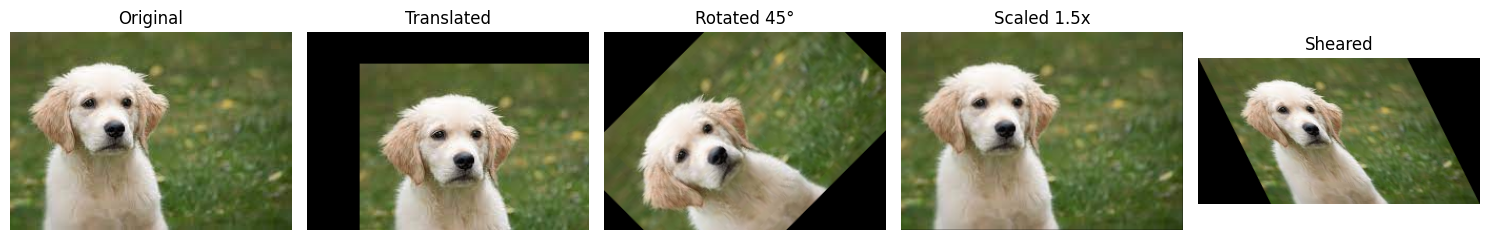

Translation Matrix:
 [[ 1.  0. 50.]
 [ 0.  1. 30.]]

Rotation Matrix:
 [[  0.70710678   0.70710678 -27.22034611]
 [ -0.70710678   0.70710678 122.28427125]]

Scaling Matrix:
 [[1.5 0.  0. ]
 [0.  1.5 0. ]]

Shearing Matrix:
 [[1.  0.5 0. ]
 [0.  1.  0. ]]


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image.jpeg')
if img is None:
    print("Error: Image not found")
    exit()

h, w = img.shape[:2]

def display_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    if n == 1:
        axes = [axes]

    for i, (img, title) in enumerate(zip(images, titles)):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img_rgb)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# 1. Translation
tx, ty = 50, 30  # Shift by 50 pixels right, 30 pixels down
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated = cv2.warpAffine(img, translation_matrix, (w, h))

# 2. Rotation
angle = 45  # Rotate by 45 degrees
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, rotation_matrix, (w, h))

# 3. Scaling
scale_x, scale_y = 1.5, 1.5  # Scale by 1.5 times
scaling_matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])
scaled = cv2.warpAffine(img, scaling_matrix, (int(w * scale_x), int(h * scale_y)))

# 4. Shearing
shear_factor = 0.5
shearing_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
sheared = cv2.warpAffine(img, shearing_matrix, (w + int(h * shear_factor), h))

display_images(
    [img, translated, rotated, scaled, sheared],
    ['Original', 'Translated', 'Rotated 45°', 'Scaled 1.5x', 'Sheared']
)

print("Translation Matrix:\n", translation_matrix)
print("\nRotation Matrix:\n", rotation_matrix)
print("\nScaling Matrix:\n", scaling_matrix)
print("\nShearing Matrix:\n", shearing_matrix)

(b) 3D Transformation

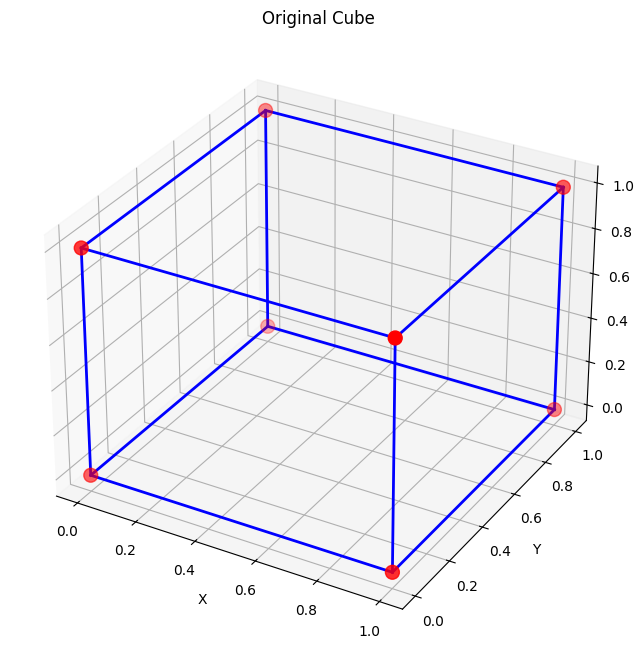

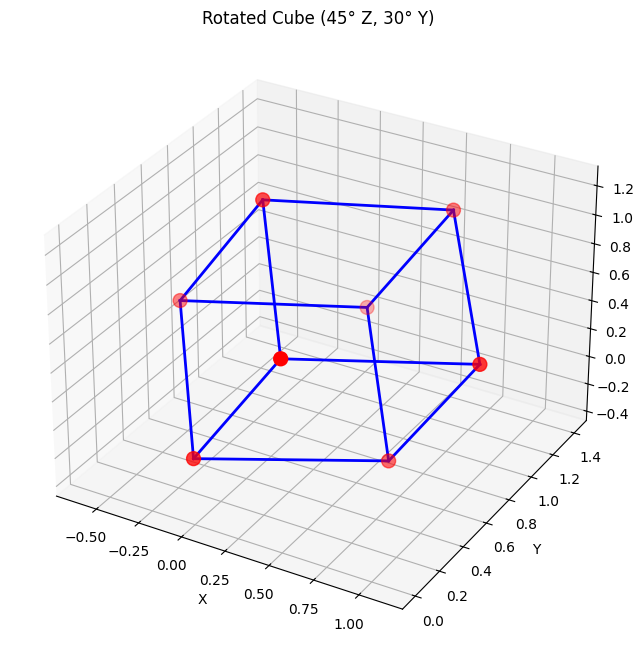

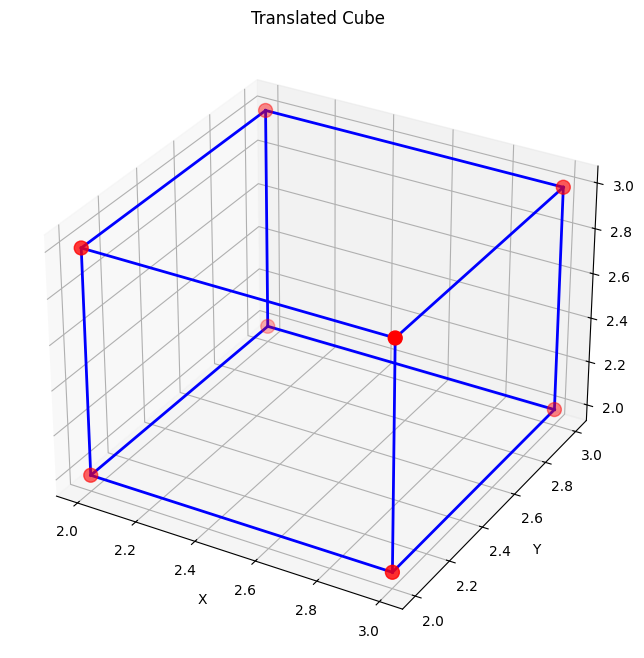

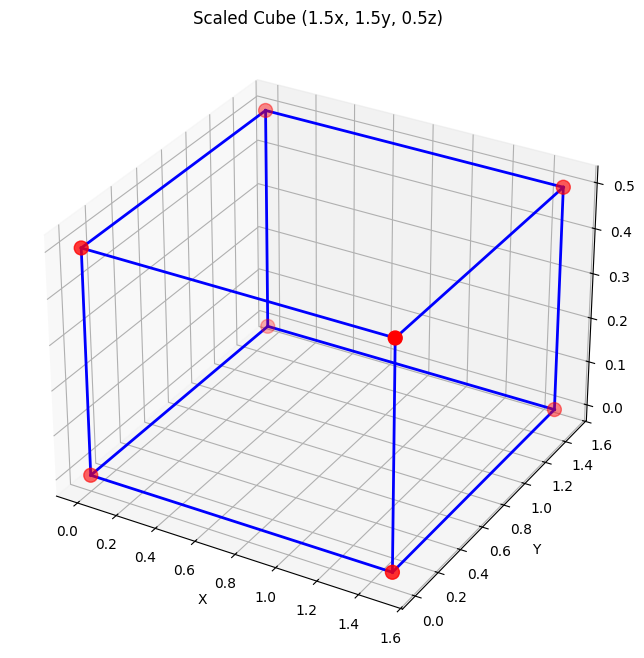

3D transformations applied successfully!


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_cube():
    vertices = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],  # Bottom face
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]   # Top face
    ])
    return vertices

def rotate_3d_z(vertices, angle_deg):
    angle = np.radians(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])
    return vertices @ rotation_matrix.T

# 3D Rotation around Y-axis
def rotate_3d_y(vertices, angle_deg):
    angle = np.radians(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle), 0, np.sin(angle)],
        [0, 1, 0],
        [-np.sin(angle), 0, np.cos(angle)]
    ])
    return vertices @ rotation_matrix.T

# 3D Translation
def translate_3d(vertices, tx, ty, tz):
    translation = np.array([tx, ty, tz])
    return vertices + translation

# 3D Scaling
def scale_3d(vertices, sx, sy, sz):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, sz]
    ])
    return vertices @ scaling_matrix.T

def plot_cube(vertices, title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define edges
    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Bottom face
        [4, 5], [5, 6], [6, 7], [7, 4],  # Top face
        [0, 4], [1, 5], [2, 6], [3, 7]   # Vertical edges
    ]

    for edge in edges:
        points = vertices[edge]
        ax.plot3D(*points.T, 'b-', linewidth=2)

    ax.scatter(*vertices.T, c='r', s=100)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

original_cube = create_cube()
rotated_cube = rotate_3d_y(rotate_3d_z(original_cube, 45), 30)
translated_cube = translate_3d(original_cube, 2, 2, 2)
scaled_cube = scale_3d(original_cube, 1.5, 1.5, 0.5)

plot_cube(original_cube, "Original Cube")
plot_cube(rotated_cube, "Rotated Cube (45° Z, 30° Y)")
plot_cube(translated_cube, "Translated Cube")
plot_cube(scaled_cube, "Scaled Cube (1.5x, 1.5y, 0.5z)")

print("3D transformations applied successfully!")

(c) Homogeneous Coordinates

In [5]:
import numpy as np

point_2d = np.array([3, 4])
print("Original 2D Point:", point_2d)

# Convert to homogeneous coordinates
point_homogeneous = np.array([3, 4, 1])
print("Homogeneous Coordinates:", point_homogeneous)

translation_matrix = np.array([
    [1, 0, 10],  # Translate x by 10
    [0, 1, 5],   # Translate y by 5
    [0, 0, 1]    # Homogeneous row
])

# Apply transformation
translated_point = translation_matrix @ point_homogeneous
print("\nTranslation Matrix:\n", translation_matrix)
print("Translated Point (Homogeneous):", translated_point)
print("Translated Point (2D):", translated_point[:2])

angle = np.radians(45)
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle), 0],
    [np.sin(angle), np.cos(angle), 0],
    [0, 0, 1]
])

rotated_point = rotation_matrix @ point_homogeneous
print("\nRotation Matrix:\n", rotation_matrix)
print("Rotated Point (Homogeneous):", rotated_point)
print("Rotated Point (2D):", rotated_point[:2])

combined_matrix = translation_matrix @ rotation_matrix
transformed_point = combined_matrix @ point_homogeneous
print("\nCombined Transformation Matrix:\n", combined_matrix)
print("Final Transformed Point:", transformed_point[:2])

print("\n" + "="*50)
print("WHY USE HOMOGENEOUS COORDINATES?")
print("="*50)
print("1. Unified representation: All transformations (translation, rotation, scaling)")
print("   can be represented as matrix multiplication")
print("2. Translation requires matrix multiplication (not possible with 2D coords)")
print("3. Enable perspective projection and projective transformations")
print("4. Simplify composition of multiple transformations")
print("5. The extra coordinate (w=1) allows us to represent points at infinity")

Original 2D Point: [3 4]
Homogeneous Coordinates: [3 4 1]

Translation Matrix:
 [[ 1  0 10]
 [ 0  1  5]
 [ 0  0  1]]
Translated Point (Homogeneous): [13  9  1]
Translated Point (2D): [13  9]

Rotation Matrix:
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Rotated Point (Homogeneous): [-0.70710678  4.94974747  1.        ]
Rotated Point (2D): [-0.70710678  4.94974747]

Combined Transformation Matrix:
 [[ 0.70710678 -0.70710678 10.        ]
 [ 0.70710678  0.70710678  5.        ]
 [ 0.          0.          1.        ]]
Final Transformed Point: [9.29289322 9.94974747]

WHY USE HOMOGENEOUS COORDINATES?
1. Unified representation: All transformations (translation, rotation, scaling)
   can be represented as matrix multiplication
2. Translation requires matrix multiplication (not possible with 2D coords)
3. Enable perspective projection and projective transformations
4. Simplify composition of multiple transformations
5. Th

(d) Affine Transformation

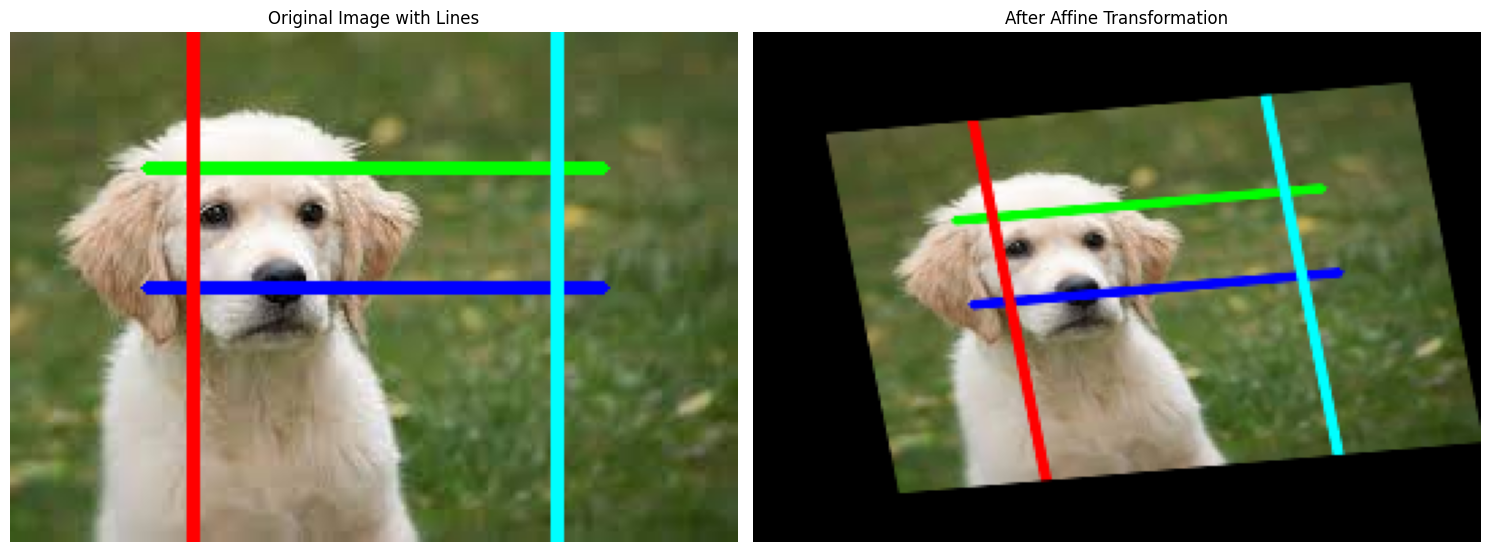

Affine Transformation Matrix:
 [[ 0.80299625  0.1433155  26.79999924]
 [-0.07041198  0.70374331 37.59999847]]

OBSERVATION:
✓ Straight lines REMAIN STRAIGHT after affine transformation
✓ Parallel lines REMAIN PARALLEL
✓ The colored lines show this property clearly
✓ Affine transformations preserve collinearity and ratios of distances


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image.jpeg')
if img is None:
    print("Error: Image not found")
    exit()

h, w = img.shape[:2]

# Draw lines on original image to check if they remain straight
img_with_lines = img.copy()
cv2.line(img_with_lines, (50, 50), (w-50, 50), (0, 255, 0), 3)
cv2.line(img_with_lines, (50, h//2), (w-50, h//2), (255, 0, 0), 3)
cv2.line(img_with_lines, (w//4, 0), (w//4, h), (0, 0, 255), 3)
cv2.line(img_with_lines, (3*w//4, 0), (3*w//4, h), (255, 255, 0), 3)

# Define source points (3 points for affine transformation)
src_points = np.float32([
    [0, 0],
    [w - 1, 0],
    [0, h - 1]
])

# Define destination points
dst_points = np.float32([
    [w * 0.1, h * 0.2],
    [w * 0.9, h * 0.1],
    [w * 0.2, h * 0.9]
])

# Get affine transformation matrix
affine_matrix = cv2.getAffineTransform(src_points, dst_points)

# Apply affine transformation
affine_transformed = cv2.warpAffine(img_with_lines, affine_matrix, (w, h))

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image with Lines')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(affine_transformed, cv2.COLOR_BGR2RGB))
axes[1].set_title('After Affine Transformation')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Affine Transformation Matrix:\n", affine_matrix)
print("\n" + "="*60)
print("OBSERVATION:")
print("="*60)
print("✓ Straight lines REMAIN STRAIGHT after affine transformation")
print("✓ Parallel lines REMAIN PARALLEL")
print("✓ The colored lines show this property clearly")
print("✓ Affine transformations preserve collinearity and ratios of distances")

(e) Projective Transformation (Homography)

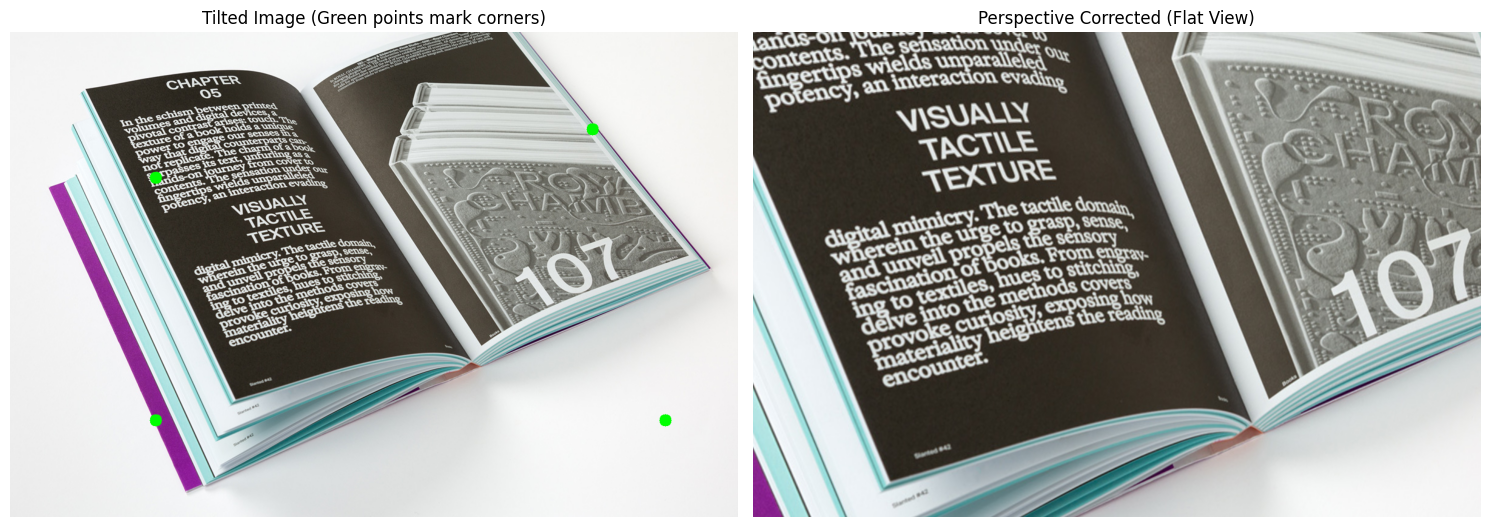

Homography Matrix:
 [[ 2.37179487e+00  0.00000000e+00 -5.69230769e+02]
 [ 2.99145299e-01  2.69230769e+00 -7.17948718e+02]
 [ 3.73931624e-04  4.00641026e-04  1.00000000e+00]]

PROJECTIVE TRANSFORMATION (HOMOGRAPHY):
✓ Corrects perspective distortion
✓ Converts tilted/angled view to head-on view
✓ Does NOT preserve parallel lines (unlike affine)
✓ Uses 4 point correspondences
✓ 3x3 transformation matrix with 8 degrees of freedom


In [14]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('book.jpeg')  # Use an image of a tilted book or document
if img is None:
    print("Error: Image not found")
    exit()

h, w = img.shape[:2]

# Define source points (corners of the tilted book in the image)
# Adjust these based on your actual tilted object
src_points = np.float32([
    [w * 0.2, h * 0.3],   # Top-left
    [w * 0.8, h * 0.2],   # Top-right
    [w * 0.9, h * 0.8],   # Bottom-right
    [w * 0.2, h * 0.8]    # Bottom-left
])

# Define destination points (perfect rectangle)
dst_points = np.float32([
    [0, 0],
    [w, 0],
    [w, h],
    [0, h]
])

# Calculate homography matrix
homography_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Apply perspective transformation
corrected = cv2.warpPerspective(img, homography_matrix, (w, h))

# Draw source points on original image
img_with_points = img.copy()
for point in src_points:
    cv2.circle(img_with_points, tuple(point.astype(int)), 10, (0, 255, 0), -1)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(cv2.cvtColor(img_with_points, cv2.COLOR_BGR2RGB))
axes[0].set_title('Tilted Image (Green points mark corners)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB))
axes[1].set_title('Perspective Corrected (Flat View)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Homography Matrix:\n", homography_matrix)
print("\n" + "="*60)
print("PROJECTIVE TRANSFORMATION (HOMOGRAPHY):")
print("="*60)
print("✓ Corrects perspective distortion")
print("✓ Converts tilted/angled view to head-on view")
print("✓ Does NOT preserve parallel lines (unlike affine)")
print("✓ Uses 4 point correspondences")
print("✓ 3x3 transformation matrix with 8 degrees of freedom")

Q2: Perspective Correction (Unwarping)

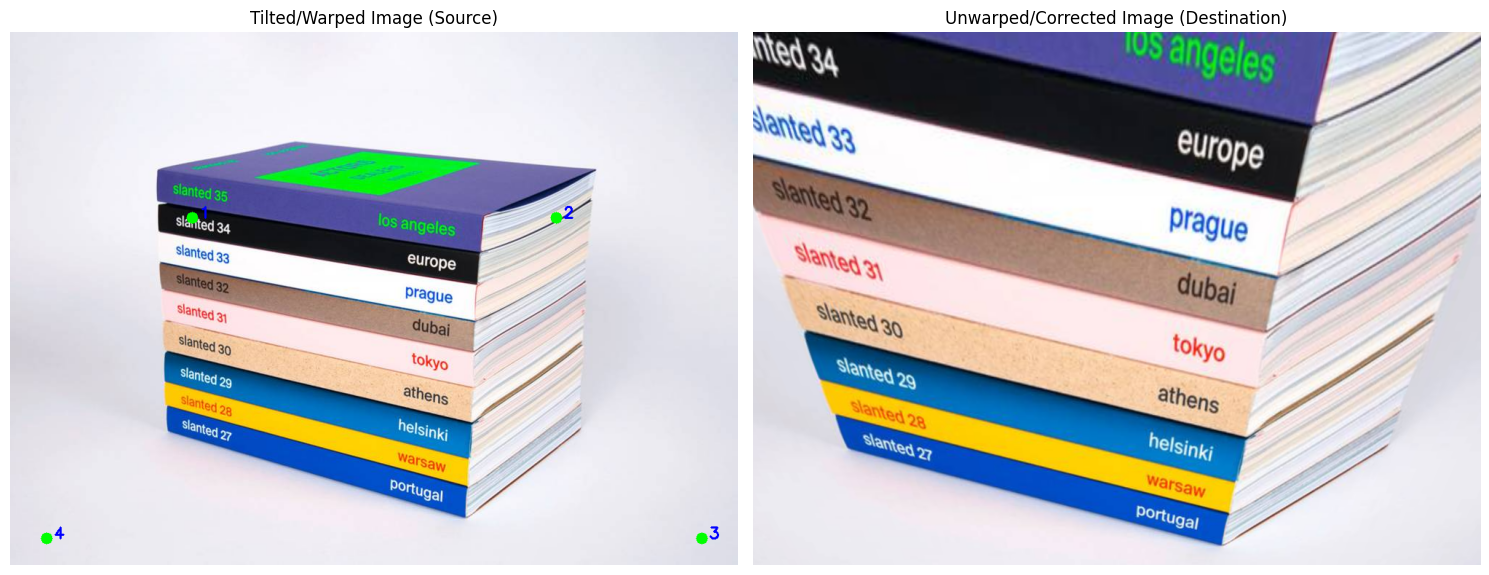

Inverse Homography Matrix:
 [[ 3.74999968e+00  1.70532050e+00 -1.37499988e+03]
 [-4.78681422e-16  5.62499954e+00 -1.44309356e+03]
 [ 2.70839594e-19  3.41064079e-03  1.00000000e+00]]

Perspective correction completed successfully!
The tilted view has been corrected to a head-on rectangular view.


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('book-tilt.jpg')
if img is None:
    print("Error: Image not found")
    exit()

h, w = img.shape[:2]

# Source points: The tilted/warped corners in the current image
# These are the corners of the tilted document
src_points = np.float32([
    [w * 0.25, h * 0.35],  # Top-left (compressed/tilted)
    [w * 0.75, h * 0.35],  # Top-right (compressed/tilted)
    [w * 0.95, h * 0.95],  # Bottom-right (normal)
    [w * 0.05, h * 0.95]   # Bottom-left (normal)
])

# Destination points: Perfect rectangle (unwarped/corrected)
dst_points = np.float32([
    [0, 0],
    [w, 0],
    [w, h],
    [0, h]
])

# Calculate the inverse homography matrix
inverse_homography = cv2.getPerspectiveTransform(src_points, dst_points)

# Apply the inverse transformation to unwarp the image
unwarped = cv2.warpPerspective(img, inverse_homography, (w, h))

# Visualize the source points on original image
img_marked = img.copy()
for i, point in enumerate(src_points):
    pt = tuple(point.astype(int))
    cv2.circle(img_marked, pt, 8, (0, 255, 0), -1)
    cv2.putText(img_marked, str(i+1), (pt[0]+10, pt[1]),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(cv2.cvtColor(img_marked, cv2.COLOR_BGR2RGB))
axes[0].set_title('Tilted/Warped Image (Source)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(unwarped, cv2.COLOR_BGR2RGB))
axes[1].set_title('Unwarped/Corrected Image (Destination)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Inverse Homography Matrix:\n", inverse_homography)
print("\nPerspective correction completed successfully!")
print("The tilted view has been corrected to a head-on rectangular view.")

Q3: Undistort Live Camera Feed

In [2]:
import cv2
import numpy as np

# Step 1: Load calibration parameters (you must calibrate first)
# These should be saved from the calibration process
try:
    calibration_data = np.load('camera_calibration.npz')
    camera_matrix = calibration_data['camera_matrix']
    dist_coeffs = calibration_data['dist_coeffs']
    print("Calibration data loaded successfully!")
except:
    print("Error: Calibration file not found!")
    print("Please run camera calibration first and save the parameters.")
    exit()

# Step 2: Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot open camera")
    exit()

print("Press 'q' to quit")
print("Press 's' to toggle between distorted and undistorted view")

show_undistorted = True

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Cannot read frame")
        break

    # Apply undistortion
    if show_undistorted:
        undistorted_frame = cv2.undistort(frame, camera_matrix, dist_coeffs)
        cv2.putText(undistorted_frame, "UNDISTORTED", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Camera Feed', undistorted_frame)
    else:
        cv2.putText(frame, "ORIGINAL (DISTORTED)", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.imshow('Camera Feed', frame)

    # Handle key presses
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('s'):
        show_undistorted = not show_undistorted

cap.release()
cv2.destroyAllWindows()

Calibration data loaded successfully!
Press 'q' to quit
Press 's' to toggle between distorted and undistorted view


Camera Calibration Code 

In [1]:
import cv2
import numpy as np
import glob

# Checkerboard dimensions
CHECKERBOARD = (7, 10)
square_size = 15.0  # Size of checkerboard square in your units

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
objp *= square_size

objpoints = []
imgpoints = []

# Capture images from webcam
cap = cv2.VideoCapture(0)
count = 0

print("Press SPACE to capture calibration images")
print("Press 'q' when done (capture at least 10-20 images)")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret_corners, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

    display_frame = frame.copy()

    if ret_corners:
        cv2.drawChessboardCorners(display_frame, CHECKERBOARD, corners, ret_corners)
        cv2.putText(display_frame, f"Pattern detected! Press SPACE ({count} captured)",
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else:
        cv2.putText(display_frame, f"No pattern detected ({count} captured)",
                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    cv2.imshow('Calibration', display_frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord(' ') and ret_corners:
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        objpoints.append(objp)
        imgpoints.append(corners2)
        count += 1
        print(f"Captured image {count}")

    elif key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

if count >= 10:
    print(f"\nCalibrating camera with {count} images...")
    ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, gray.shape[::-1], None, None
    )

    # Calculate reprojection error
    total_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i],
                                          camera_matrix, dist_coeffs)
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
        total_error += error

    mean_error = total_error / len(objpoints)

    print("\n" + "="*50)
    print("CALIBRATION RESULTS")
    print("="*50)
    print("Camera Matrix:\n", camera_matrix)
    print("\nDistortion Coefficients:\n", dist_coeffs)
    print(f"\nMean Reprojection Error: {mean_error:.4f} pixels")

    # Save calibration parameters
    np.savez('camera_calibration.npz',
             camera_matrix=camera_matrix,
             dist_coeffs=dist_coeffs)
    print("\nCalibration saved to 'camera_calibration.npz'")
else:
    print("Not enough images captured for calibration!")

Press SPACE to capture calibration images
Press 'q' when done (capture at least 10-20 images)
Captured image 1
Captured image 2
Captured image 3
Captured image 4
Captured image 5
Captured image 6
Captured image 7
Captured image 8
Captured image 9
Captured image 10
Captured image 11
Captured image 12
Captured image 13
Captured image 14
Captured image 15
Captured image 16

Calibrating camera with 16 images...

CALIBRATION RESULTS
Camera Matrix:
 [[630.30163295   0.         326.17119958]
 [  0.         628.48125488 229.31334988]
 [  0.           0.           1.        ]]

Distortion Coefficients:
 [[-0.02074837  0.3710223   0.00384976 -0.00324443 -1.0093632 ]]

Mean Reprojection Error: 0.0629 pixels

Calibration saved to 'camera_calibration.npz'


Q4: Build a 3D Model from Images Using COLMAP

In [ ]:
import os
import subprocess

# ============================================================
# CONFIGURATION - UPDATE THESE PATHS
# ============================================================
# Path to COLMAP executable (update this to your actual path)
COLMAP_PATH = r"C:\Users\worka\Downloads\colmap-x64-windows-cuda\COLMAP.bat"  # or COLMAP.exe
# Example: r"C:\Users\YourName\Downloads\COLMAP-3.8-windows-cuda\COLMAP.bat"

# Path to your images
image_path = "./images"  # Update this path

# Project paths
project_path = "./"
database_path = os.path.join(project_path, "database.db")
sparse_path = os.path.join(project_path, "sparse")
dense_path = os.path.join(project_path, "dense")

# ============================================================
# SETUP
# ============================================================
# Create directories
os.makedirs(project_path, exist_ok=True)
os.makedirs(sparse_path, exist_ok=True)
os.makedirs(dense_path, exist_ok=True)

# Check if COLMAP exists
if not os.path.exists(COLMAP_PATH):
    print("ERROR: COLMAP executable not found!")
    print(f"Looking for: {COLMAP_PATH}")
    print("\nPlease update COLMAP_PATH in the code to point to:")
    print("  - COLMAP.bat (for batch file)")
    print("  - COLMAP.exe (for executable)")
    print("\nExample paths:")
    print("  r'C:\\COLMAP\\COLMAP.bat'")
    print("  r'C:\\Program Files\\COLMAP\\COLMAP.exe'")
    exit()

# Check if images exist
if not os.path.exists(image_path):
    print(f"ERROR: Image directory not found: {image_path}")
    print("Please update image_path to point to your images folder")
    exit()

image_count = len([f for f in os.listdir(image_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
if image_count == 0:
    print(f"ERROR: No images found in {image_path}")
    exit()

print("="*70)
print("COLMAP 3D RECONSTRUCTION PIPELINE")
print("="*70)
print(f"COLMAP Path: {COLMAP_PATH}")
print(f"Images: {image_path} ({image_count} images)")
print(f"Project: {project_path}")
print("="*70)

# ============================================================
# STEP 1: FEATURE EXTRACTION
# ============================================================
print("\n[1/5] Extracting features...")
print("This may take several minutes depending on image count and size...")

result = subprocess.run([
    COLMAP_PATH, "feature_extractor",
    "--database_path", database_path,
    "--image_path", image_path,
    "--ImageReader.camera_model", "SIMPLE_RADIAL",
    "--ImageReader.single_camera", "1"
], capture_output=True, text=True)

if result.returncode != 0:
    print("ERROR in feature extraction:")
    print(result.stderr)
    exit()
else:
    print("✓ Feature extraction complete")

# ============================================================
# STEP 2: FEATURE MATCHING
# ============================================================
print("\n[2/5] Matching features...")
print("This may take a while for large image sets...")

result = subprocess.run([
    COLMAP_PATH, "exhaustive_matcher",
    "--database_path", database_path
], capture_output=True, text=True)

if result.returncode != 0:
    print("ERROR in feature matching:")
    print(result.stderr)
    exit()
else:
    print("✓ Feature matching complete")

# ============================================================
# STEP 3: SPARSE RECONSTRUCTION (SfM)
# ============================================================
print("\n[3/5] Running sparse reconstruction (Structure from Motion)...")
print("This creates the camera poses and sparse 3D point cloud...")

result = subprocess.run([
    COLMAP_PATH, "mapper",
    "--database_path", database_path,
    "--image_path", image_path,
    "--output_path", sparse_path
], capture_output=True, text=True)

if result.returncode != 0:
    print("ERROR in sparse reconstruction:")
    print(result.stderr)
    exit()
else:
    print("✓ Sparse reconstruction complete")

# ============================================================
# STEP 4: IMAGE UNDISTORTION
# ============================================================
print("\n[4/5] Undistorting images for dense reconstruction...")

# Check if sparse reconstruction succeeded
sparse_model_path = os.path.join(sparse_path, "0")
if not os.path.exists(sparse_model_path):
    print("ERROR: No sparse model found. Reconstruction may have failed.")
    print("Check if images have sufficient overlap and features.")
    exit()

result = subprocess.run([
    COLMAP_PATH, "image_undistorter",
    "--image_path", image_path,
    "--input_path", sparse_model_path,
    "--output_path", dense_path,
    "--output_type", "COLMAP"
], capture_output=True, text=True)

if result.returncode != 0:
    print("ERROR in image undistortion:")
    print(result.stderr)
    exit()
else:
    print("✓ Image undistortion complete")

# ============================================================
# STEP 5: DENSE STEREO RECONSTRUCTION
# ============================================================
print("\n[5/5] Dense stereo reconstruction...")
print("This creates depth maps for each image (slowest step)...")

result = subprocess.run([
    COLMAP_PATH, "patch_match_stereo",
    "--workspace_path", dense_path,
    "--PatchMatchStereo.geom_consistency", "true"
], capture_output=True, text=True)

if result.returncode != 0:
    print("Warning: Dense stereo may have encountered issues")
    print(result.stderr)
else:
    print("✓ Dense stereo reconstruction complete")

# STEP 6: STEREO FUSION
print("\n[6/6] Fusing depth maps into point cloud...")

result = subprocess.run([
    COLMAP_PATH, "stereo_fusion",
    "--workspace_path", dense_path,
    "--output_path", os.path.join(dense_path, "fused.ply"),
    "--input_type", "geometric"
], capture_output=True, text=True)

if result.returncode != 0:
    print("Warning: Stereo fusion may have encountered issues")
    print(result.stderr)
else:
    print("✓ Stereo fusion complete")

print("\n" + "="*70)
print("3D RECONSTRUCTION COMPLETE!")
print("="*70)

# Check output files
sparse_output = os.path.join(sparse_path, "0")
dense_output = os.path.join(dense_path, "fused.ply")

print("\nOutput Files:")
print(f"  ✓ Sparse model: {sparse_output}")
if os.path.exists(dense_output):
    print(f"  ✓ Dense point cloud: {dense_output}")
    file_size = os.path.getsize(dense_output) / (1024 * 1024)  # MB
    print(f"    Size: {file_size:.2f} MB")
else:
    print(f"  ⚠ Dense point cloud not found (may need more time or failed)")

print("\n" + "="*70)
print("VISUALIZATION OPTIONS:")
print("="*70)
print("1. Use COLMAP GUI:")
print(f"   {COLMAP_PATH} gui")
print("   Then: File -> Import Model -> Select sparse/0")
print("\n2. View .ply file in:")
print("   - MeshLab (https://www.meshlab.net/)")
print("   - CloudCompare (https://www.cloudcompare.org/)")
print("   - Blender (https://www.blender.org/)")
print("="*70)

COLMAP 3D RECONSTRUCTION PIPELINE
COLMAP Path: C:\Users\worka\Downloads\colmap-x64-windows-cuda\COLMAP.bat
Images: ./images (128 images)
Project: ./

[1/5] Extracting features...
This may take several minutes depending on image count and size...
✓ Feature extraction complete

[2/5] Matching features...
This may take a while for large image sets...
✓ Feature matching complete

[3/5] Running sparse reconstruction (Structure from Motion)...
This creates the camera poses and sparse 3D point cloud...
✓ Sparse reconstruction complete

[4/5] Undistorting images for dense reconstruction...
✓ Image undistortion complete

[5/5] Dense stereo reconstruction...
This creates depth maps for each image (slowest step)...


Python Script to Visualize COLMAP Output

In [ ]:
import numpy as np
import open3d as o3d

print("Loading point cloud...")
pcd = o3d.io.read_point_cloud("./colmap_project/dense/fused.ply")

print(f"Point cloud has {len(pcd.points)} points")

print("Visualizing 3D model...")
print("Controls:")
print("  - Mouse: Rotate view")
print("  - Scroll: Zoom")
print("  - Ctrl + Mouse: Pan")

o3d.visualization.draw_geometries([pcd],
                                  window_name="COLMAP 3D Reconstruction",
                                  width=1024,
                                  height=768)

o3d.io.write_point_cloud("./output_model.pcd", pcd)
print("Model saved as output_model.pcd")